Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection & Preprocessing

In [2]:
gold_dataset = pd.read_csv('gold_dataset.csv')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last 5 rows of dataset
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_dataset.shape

(2290, 6)

In [6]:
# basic informatio of the dataset
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# get the statistical measure of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Postitive Correlation
2. Negative Correlation

In [9]:
correlation = gold_dataset.corr()

<AxesSubplot:>

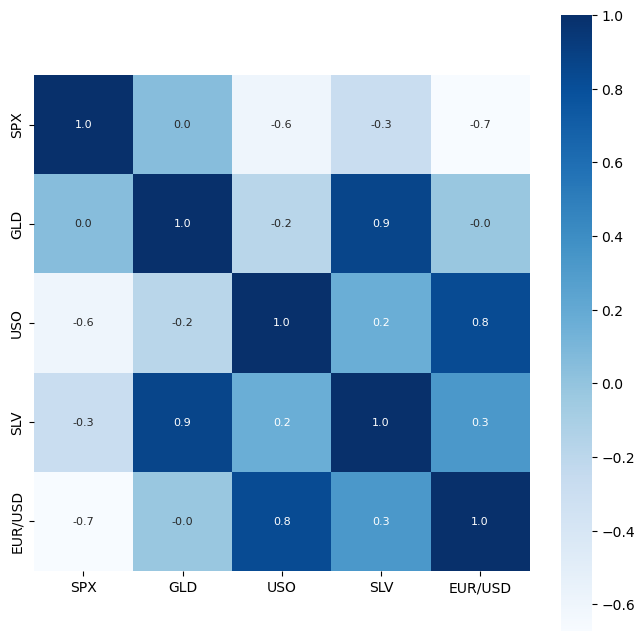

In [10]:
# construct a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/q2/gz2_d6hs3rgbqpws2vy0ndsm0000gn/T/ipykernel_79079/2465066902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<AxesSubplot:xlabel='GLD', ylabel='Density'>

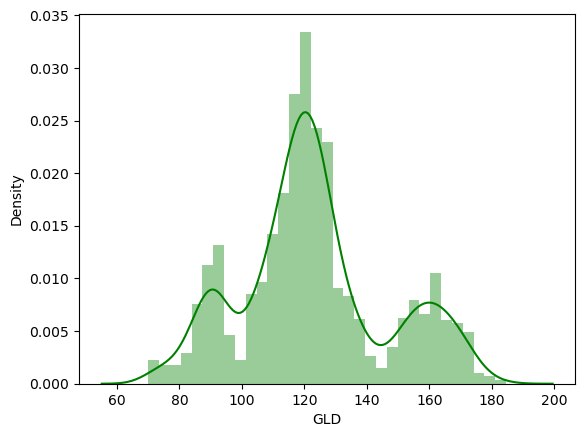

In [12]:
# check the distribution of the GLD price
sns.distplot(gold_dataset['GLD'],color='green')

Split the feaures & target

In [13]:
X = gold_dataset.drop(['Date','GLD'], axis=1)
Y = gold_dataset['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train & Test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model training:

Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
# train the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [19]:
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.51449925  81.96209975 115.85729984 127.66600094 120.84650134
 154.81409774 150.27679869 125.98860052 117.38259887 126.06170078
 116.70420078 171.29080076 141.84059833 168.00699862 115.25279982
 117.45690008 136.69680391 170.25930104 159.66230337 158.30229864
 155.11980022 125.60940035 175.42769954 157.0002034  125.13940034
  93.70909979  76.71540032 120.67529983 119.18419957 167.45890006
  88.05400039 125.31560024  91.04150078 117.54440053 121.05419943
 135.97420095 115.42850157 115.02810066 146.80959961 107.18950106
 104.20950271  87.16459804 126.65500039 117.92310028 153.21239932
 119.6798999  108.41499962 108.36969843  93.03920004 127.06839782
  74.72350009 113.76049912 121.54339998 111.2712988  118.77149889
 120.4394995  159.98049997 168.98120192 147.02579694  85.93919856
  94.2209004   86.82639902  90.69880015 118.87610117 126.45840071
 127.50730005 170.61330012 122.26979944 117.348299    98.87220016
 168.63580098 143.08279838 131.59360271 121.12350208 120.60679963
 119.61910

In [21]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.9897693731714781


Compare actual & predicted values in a Plot

In [22]:
Y_test = list(Y_test)

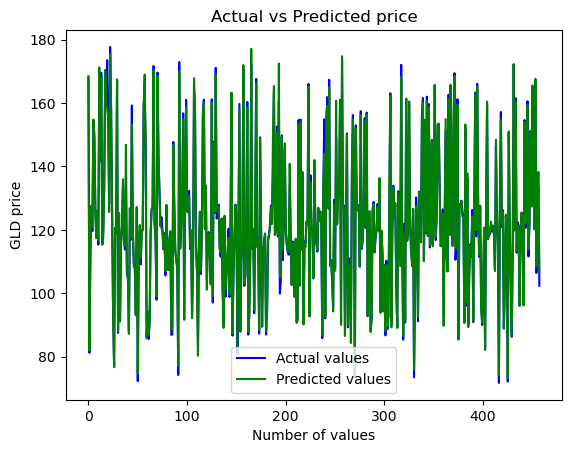

In [23]:
plt.plot(Y_test, color = 'blue', label= 'Actual values')
plt.plot(test_data_prediction, color = 'green', label= 'Predicted values')
plt.title('Actual vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()